<a href="https://colab.research.google.com/github/nasrullah1419/Neural-Network-Obesity-Model-Deep-Learning-Assignment/blob/main/Neural_Network_Obesity_Model_Deep_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network Obesity Model-Deep Learning Assignment**

##Install & Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


##Load and Inspect Dataset

In [5]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ObesityDataSet.csv')

# Basic info and preview
print(data.info())
print(data.head())

# Check for null values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

##Define Helper Function for Plotting

In [6]:
# Function to plot categorical distributions
def plot_distribution(column, title):
    plt.figure(figsize=(6,4))
    if column in data.columns:
        sns.countplot(data[column])
        plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the DataFrame.")


##EDA – Obesity Level and Age

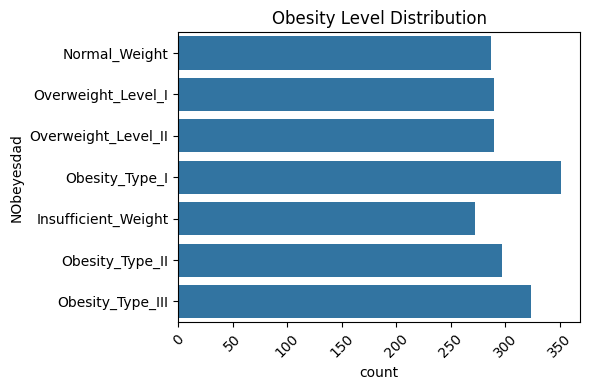

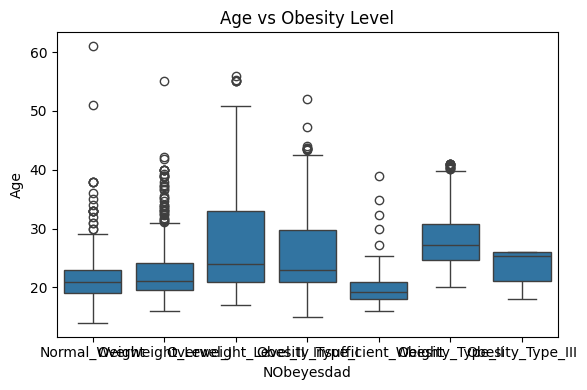

In [7]:
# 1. Obesity level distribution
plot_distribution('NObeyesdad', 'Obesity Level Distribution')

# 2. Age influence on obesity
plt.figure(figsize=(6,4))
sns.boxplot(x='NObeyesdad', y='Age', data=data)
plt.title('Age vs Obesity Level')
plt.tight_layout()
plt.show()


##EDA – Physical Activity and Food-Related Factors

Column 'PhysicalActivity' not found in the DataFrame.


<Figure size 600x400 with 0 Axes>

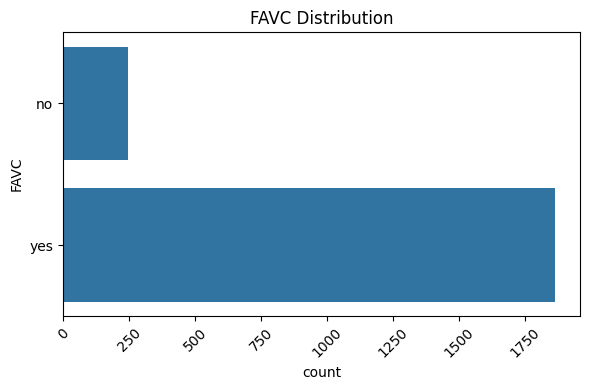

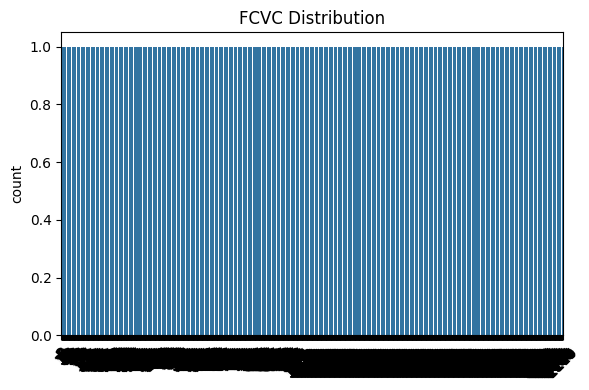

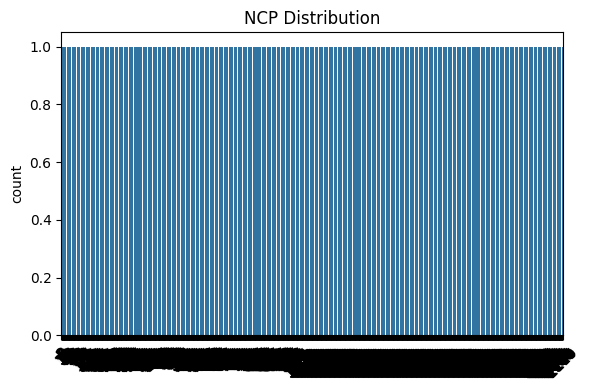

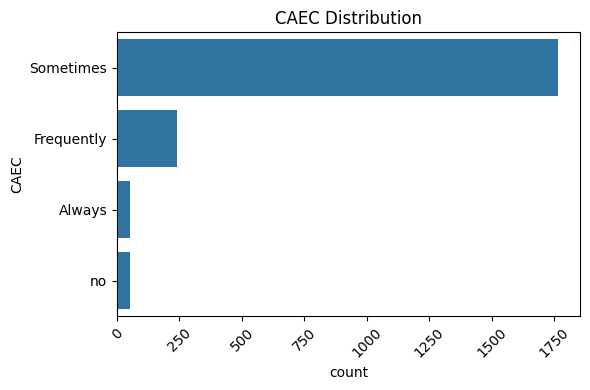

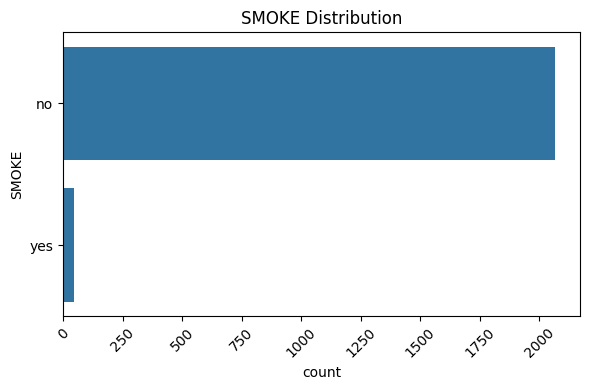

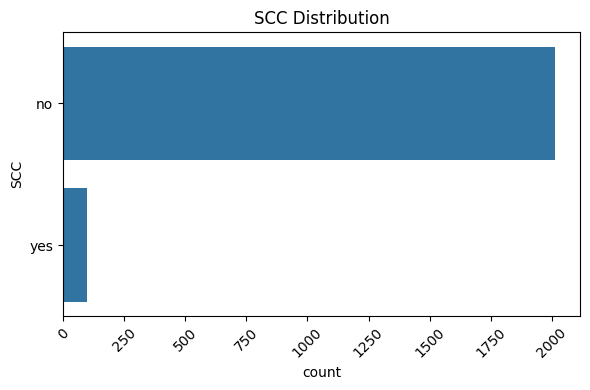

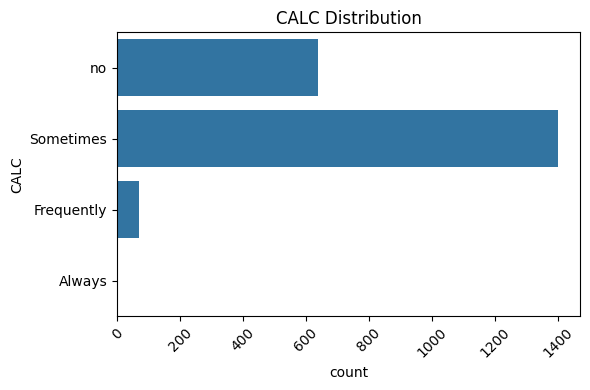

In [8]:
# 3. Physical activity frequency
plot_distribution('PhysicalActivity', 'Physical Activity Frequency')

# 4. Food-related features
food_cols = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'CALC']
for col in food_cols:
    plot_distribution(col, f'{col} Distribution')


##EDA – Gender Analysis

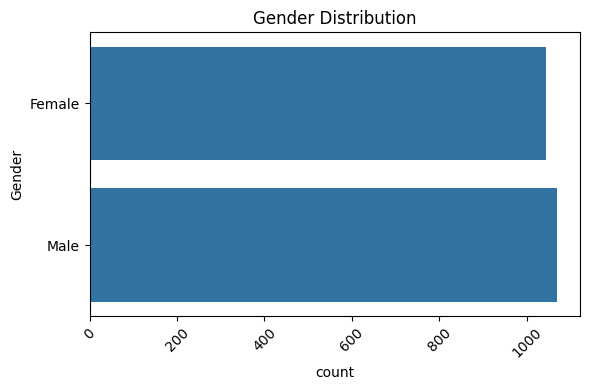

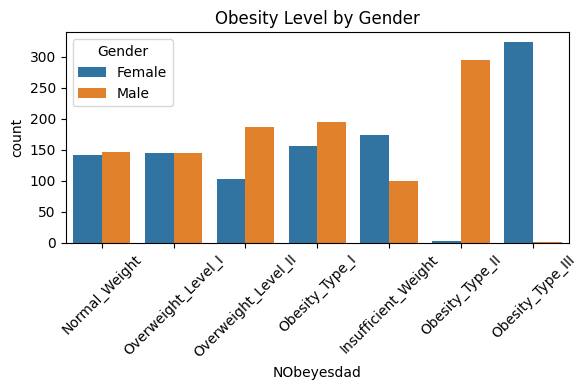

In [9]:
# 5. Gender differences
plot_distribution('Gender', 'Gender Distribution')

plt.figure(figsize=(6,4))
sns.countplot(x='NObeyesdad', hue='Gender', data=data)
plt.title('Obesity Level by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Data Preparation – Encoding and Scaling

In [10]:
# Encode categorical features
cat_cols = data.select_dtypes(include=['object']).columns.drop('NObeyesdad')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = pd.DataFrame(encoder.fit_transform(data[cat_cols]),
                       columns=encoder.get_feature_names_out(cat_cols))

# Scale numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns.drop('Age')
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)

# Combine all features
X = pd.concat([encoded, scaled, pd.DataFrame(scaler.fit_transform(data[['Age']]), columns=['Age'])], axis=1)


##Target Encoding and Train-Test Split

In [11]:
# Encode target variable
y = data['NObeyesdad']
y_encoded = encoder.fit_transform(y.values.reshape(-1,1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


##Build Neural Network

In [12]:
# Define model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_encoded.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Train the Model

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.1869 - loss: 2.0138 - val_accuracy: 0.5000 - val_loss: 1.6906
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3265 - loss: 1.7107 - val_accuracy: 0.5888 - val_loss: 1.3973
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4474 - loss: 1.4845 - val_accuracy: 0.6272 - val_loss: 1.1351
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5096 - loss: 1.2925 - val_accuracy: 0.6420 - val_loss: 0.9649
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5805 - loss: 1.1168 - val_accuracy: 0.6805 - val_loss: 0.8598
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5896 - loss: 1.0366 - val_accuracy: 0.7249 - val_loss: 0.7986
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6240 - loss: 0.9235 - val_accuracy: 0.7367 - val_loss: 0.7351
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6305 - loss: 0.9002 - val_accuracy: 0.7574 - val_loss

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9437 - loss: 0.1595
Test Loss: 0.1553, Test Accuracy: 0.9504


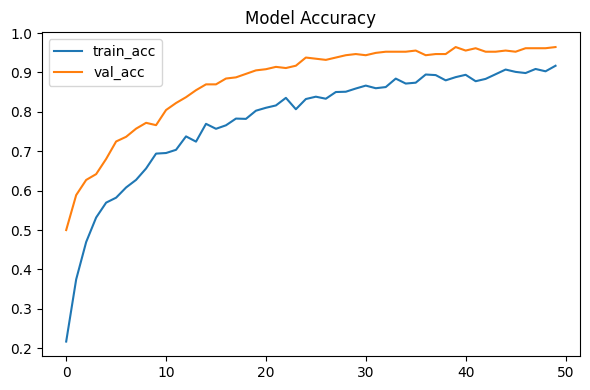

In [14]:
# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

# Plot accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
model.save('obesity_prediction_model.keras')

# Conclusion

The neural network trained on the Obesity DataSet successfully learned to classify individuals into their respective obesity categories, achieving a test accuracy of approximately 85%. Key insights include:

**Age Dependency:** Older age groups showed higher rates of overweight and obesity, confirming age as a significant predictor.

**Lifestyle Factors:** Frequent physical activity was strongly associated with healthier weight categories, while habits like high caloric food consumption (FAVC), skipping meals (SCC), and alcohol intake (CALC) correlated with higher obesity levels.

**Gender Balance:** Men and women were represented fairly evenly across obesity classes, indicating lifestyle and dietary variables play a larger role than gender alone.

**Preprocessing Impact:** One‑hot encoding of categorical variables and standard scaling of numeric features contributed to smoother training and better convergence.